# Neutralizations for DMS data validation

In [1]:
import os
import warnings

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from plotnine import *

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import yaml
plt.rcParams['svg.fonttype'] = 'none'
print(f"Using `neutcurve` version {neutcurve.__version__}")

Using `neutcurve` version 0.5.7


In [2]:
warnings.simplefilter('ignore')

Read config file.

In [3]:
with open('config.yaml') as f:
    config = yaml.safe_load(f)

In [4]:
resultsdir=config['resultsdir']
os.makedirs(resultsdir, exist_ok=True)

## Read in data

In [5]:
frac_infect = pd.read_csv(config['serum_neuts_all'], index_col=0)

## Fit Hill curve to data using [`neutcurve`](https://jbloomlab.github.io/neutcurve/)

In [6]:
fits = neutcurve.CurveFits(frac_infect,  fixtop= True)

In [7]:
fitparams = (
    fits.fitParams(ics=[50, 90, 97,98, 99])
    .assign(NT50=lambda x: 1/x['ic50'])
    )

# couldn't get lambda / conditional statement to work with assign, so try it here:
fitparams['ic50_is_bound'] = fitparams['ic50_bound'].apply(lambda x: True if x!='interpolated' else False)


In [8]:
fitparams.to_csv('results/neut_titers.csv', index=False)


In [9]:
color_list = ['#808080', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#000000', '#CC79A7']

## Plot neut curves

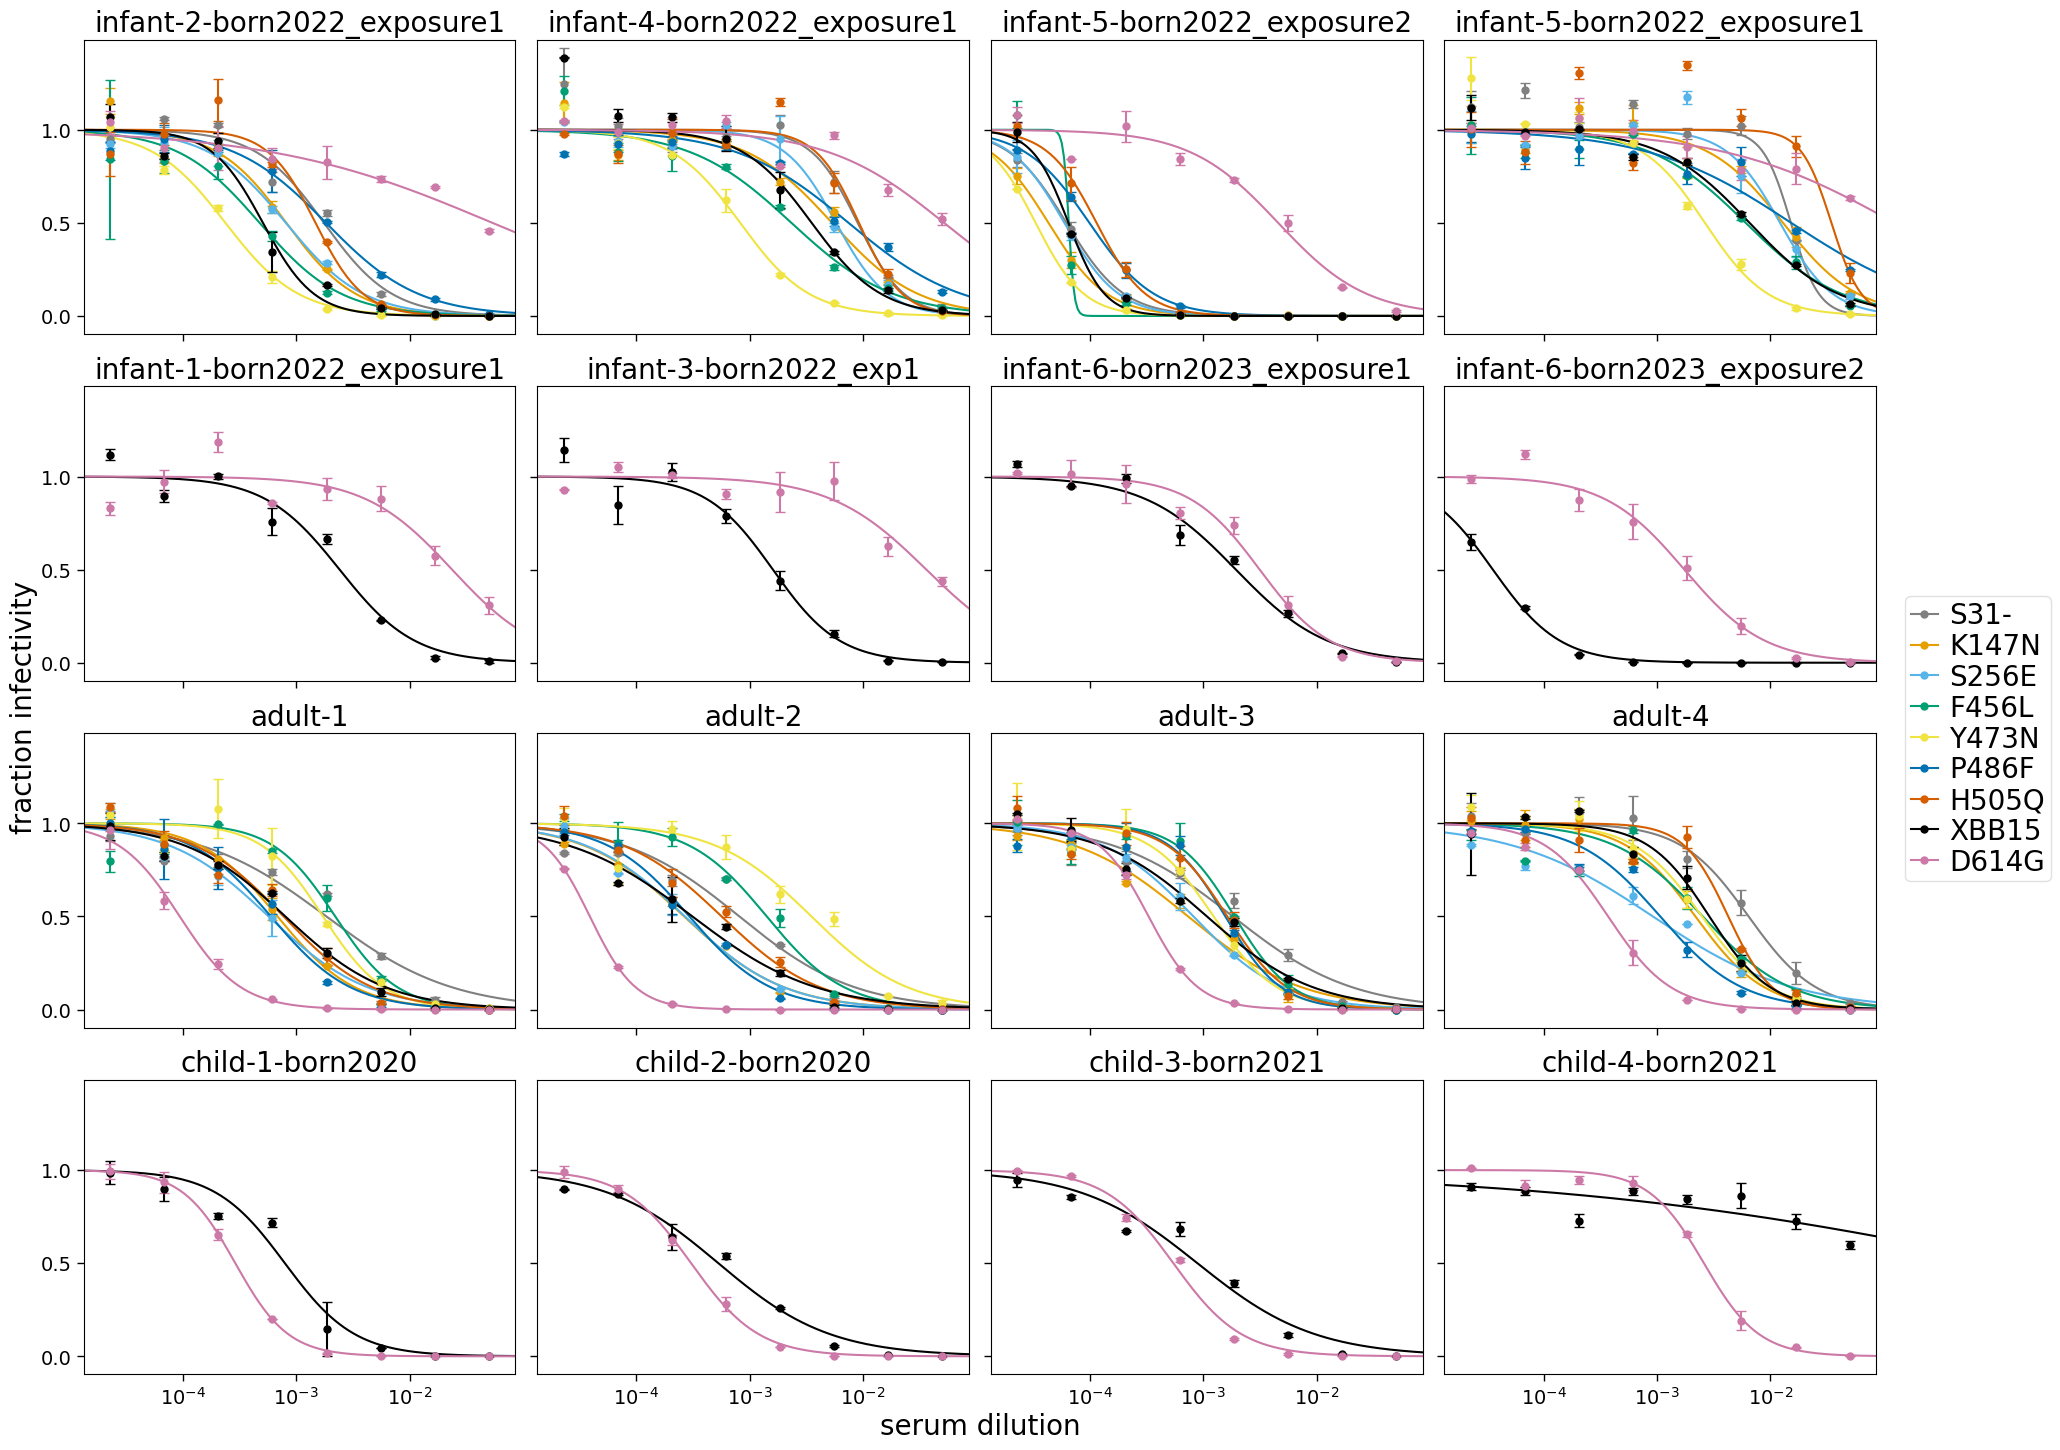

In [10]:
fig, axes = fits.plotSera(xlabel='serum dilution',
                          ncol=4,
                          widthscale=1.5,
                          heightscale=1.5,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                          max_viruses_per_subplot = 9,
                          markers=['o','o','o','o','o','o','o', 'o', 'o'],
                          colors = color_list
                         )
plotfile_pdf = 'sera_validation_NTD_neuts.pdf'
plotfile_png = 'validation_NTD_neuts.png'
fig.savefig(f'{resultsdir}/{plotfile_pdf}', bbox_inches='tight')
fig.savefig(f'{resultsdir}/{plotfile_png}', bbox_inches='tight')

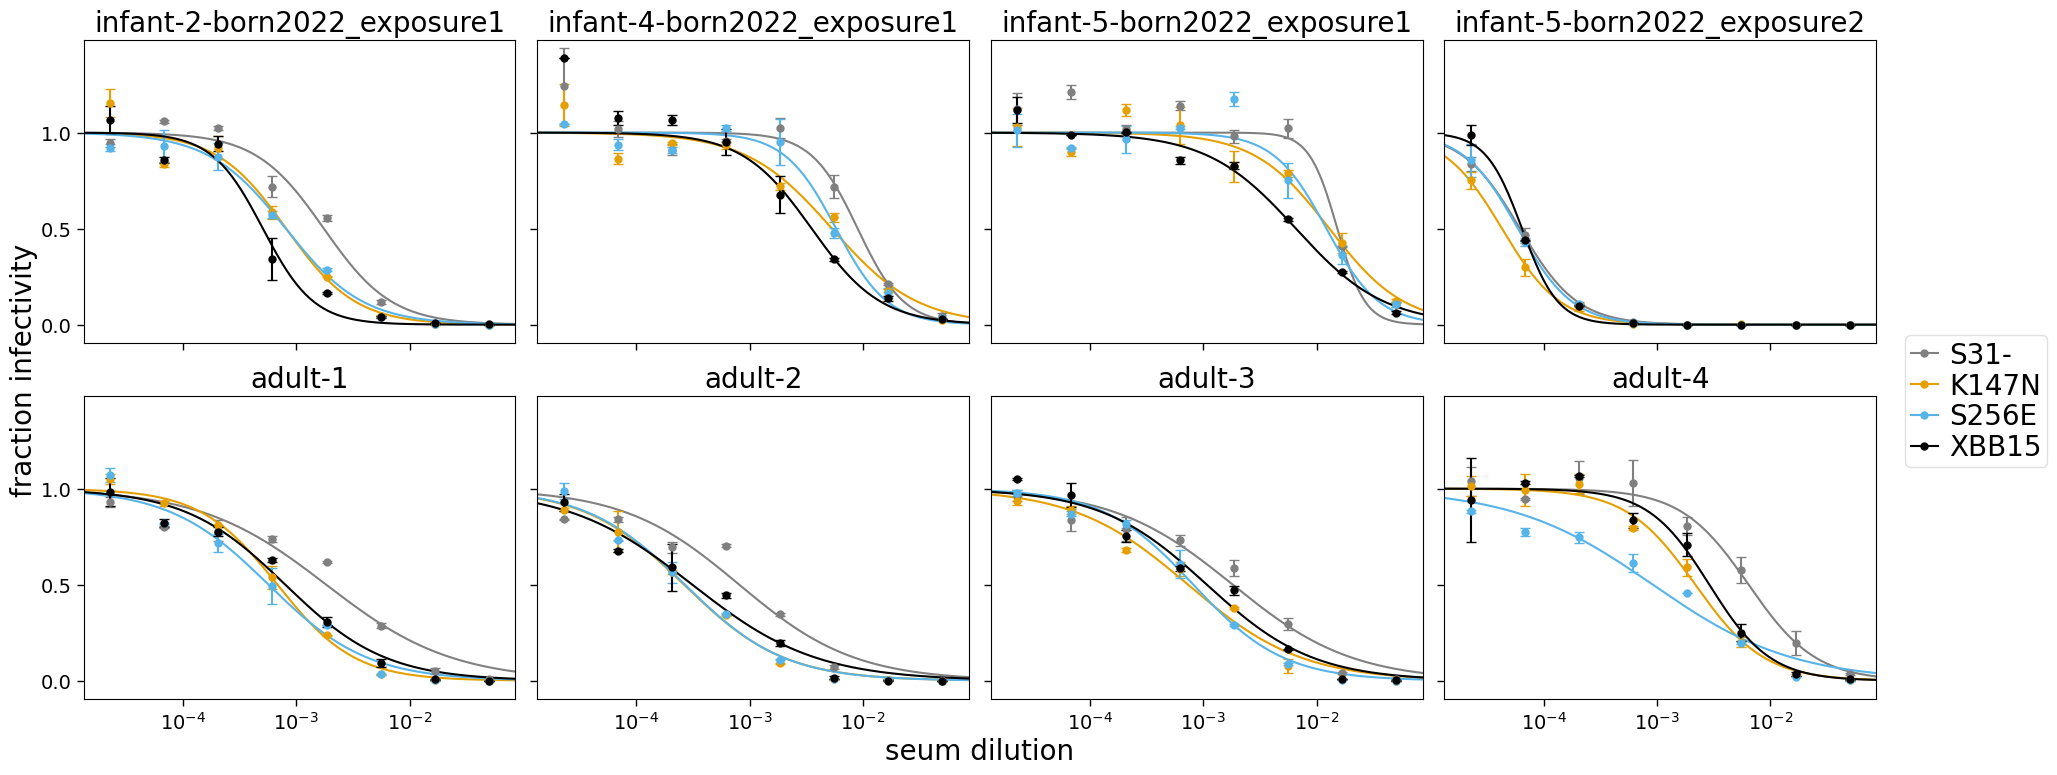

In [11]:
color_list = ['#808080', '#E69F00', '#56B4E9', '#000000']

fig, axes = fits.plotSera(xlabel='seum dilution',
                          viruses = ['S31-', 'K147N', 'S256E', 'XBB15'],
                          sera = ["infant-2-born2022_exposure1","infant-4-born2022_exposure1",
                                  "infant-5-born2022_exposure1","infant-5-born2022_exposure2",
                                 "adult-1","adult-2", "adult-3", "adult-4"],
                          ncol=4,
                          widthscale=1.5,
                          heightscale=1.5,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                          max_viruses_per_subplot = 9,
                          markers=['o','o','o','o','o','o','o', 'o', 'o'],
                          colors = color_list
                         )
plotfile_pdf = 'sera_validation_NTD_neuts.pdf'
plotfile_png = 'sera_validation_NTD_neuts.png'
fig.savefig(f'{resultsdir}/{plotfile_pdf}', bbox_inches='tight')
fig.savefig(f'{resultsdir}/{plotfile_png}', bbox_inches='tight')

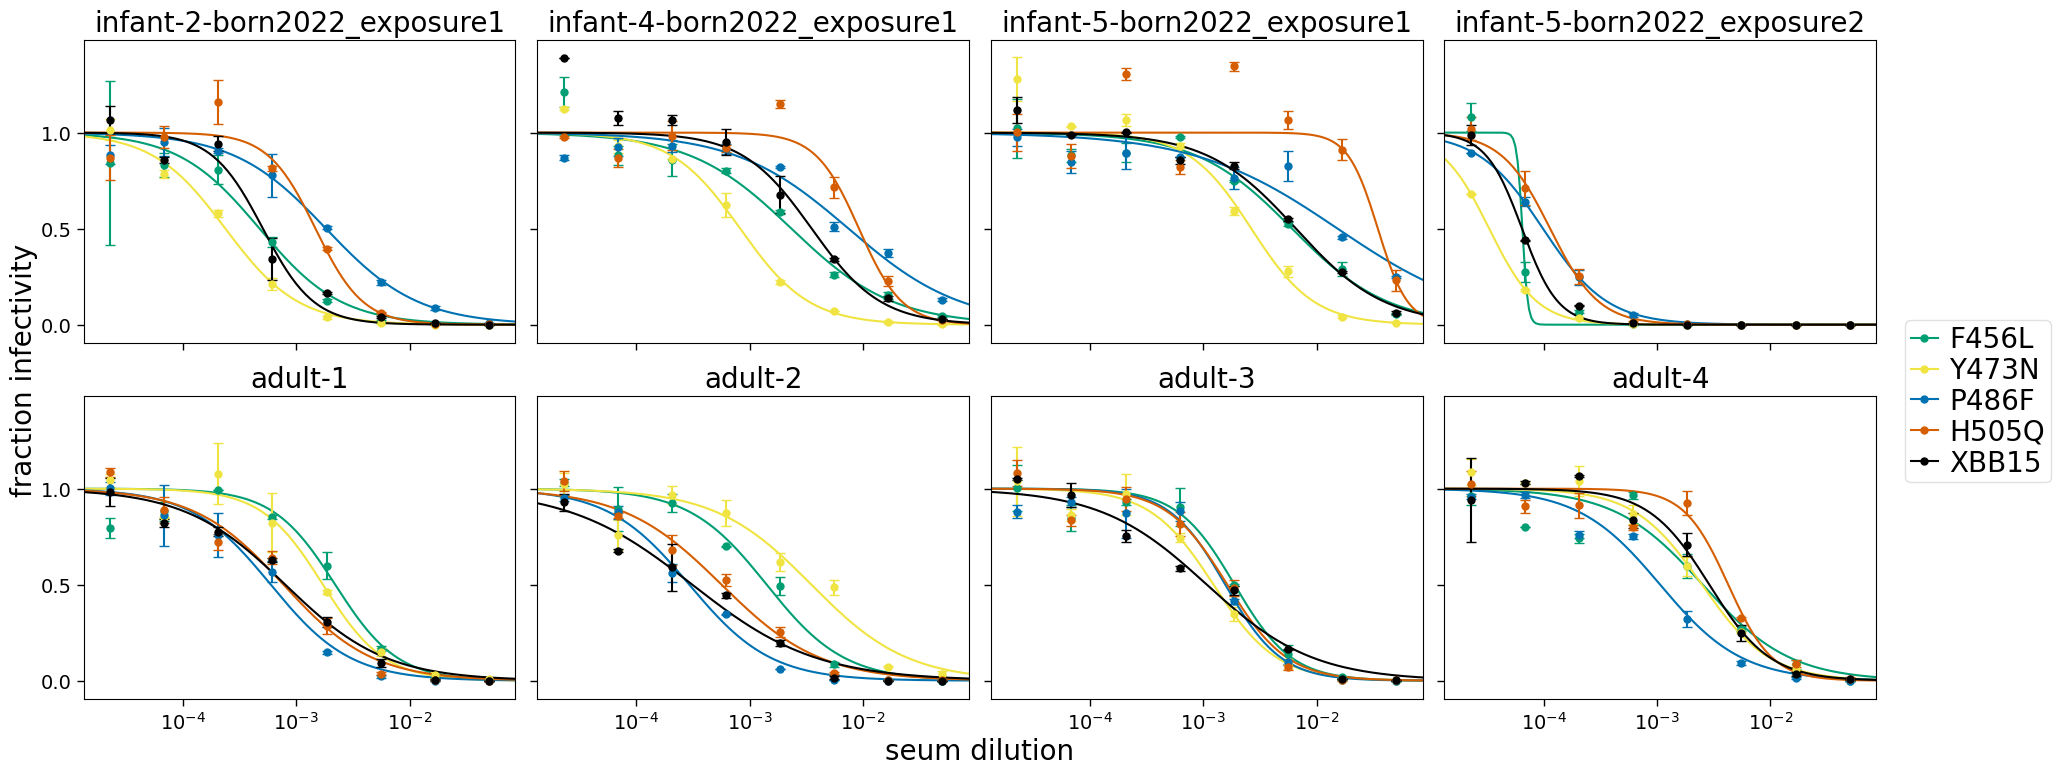

In [12]:
color_list = ['#009E73', '#F0E442', '#0072B2', '#D55E00', '#000000']

fig, axes = fits.plotSera(xlabel='seum dilution',
                          viruses = ['F456L', 'Y473N', 'P486F','H505Q','XBB15'],
                          sera = ["infant-2-born2022_exposure1","infant-4-born2022_exposure1",
                                  "infant-5-born2022_exposure1","infant-5-born2022_exposure2",
                                 "adult-1","adult-2", "adult-3", "adult-4"],
                          ncol=4,
                          widthscale=1.5,
                          heightscale=1.5,
                          titlesize=20, labelsize=20, ticksize=14,
                          legendfontsize=20, yticklocs=[0,0.5,1],
                          markersize=5, linewidth=1.5,
                          max_viruses_per_subplot = 9,
                          markers=['o','o','o','o','o','o','o', 'o', 'o'],
                          colors = color_list
                         )

plotfile_pdf = 'sera_validation_RBD_neuts.pdf'
plotfile_png = 'sera_validation_RBD_neuts.png'
fig.savefig(f'{resultsdir}/{plotfile_pdf}', bbox_inches='tight')
fig.savefig(f'{resultsdir}/{plotfile_png}', bbox_inches='tight')

In [13]:
fitparams['group'] = fitparams['serum'].apply(
    lambda x: 'adult' if x.startswith('adult') 
    else 'child' if x.startswith('child') 
    else 'infant' if x.startswith('infant') 
    else None
)

fitparams_WT = fitparams[fitparams['virus'].isin(['D614G', 'XBB15'])]

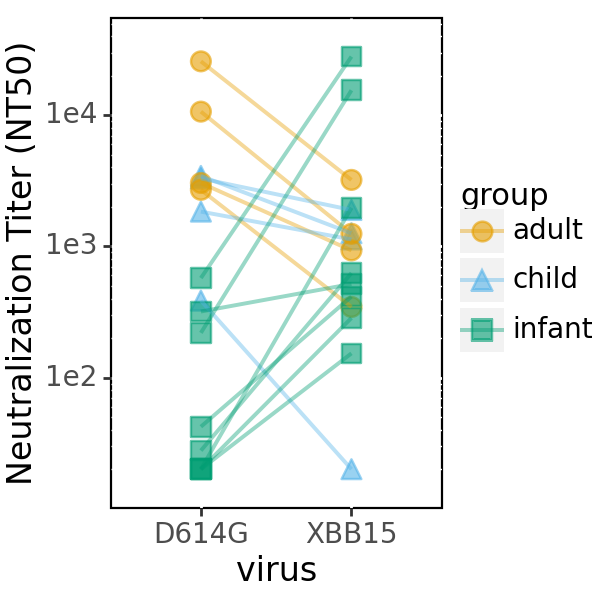

In [14]:
NT50 = (ggplot(fitparams_WT, aes(x='virus', y='NT50', group='serum', color='group', shape = 'group')) +
              geom_point(size=3.5, alpha = 0.6) +
              geom_line(size=.8, alpha = 0.4) +
              theme(
                   figure_size=(3,3),
                   axis_text=element_text(size=10),
                   axis_text_x=element_text(size=10),
                   legend_text=element_text(size=10),
                   axis_title_x=element_text(size=12),
                   axis_title_y=element_text(size=12),
                   strip_text=element_text(size=10),
                   panel_background=element_rect(fill='white'),
                   plot_background=element_rect(fill='white'),
                  panel_border=element_line(color='black', size=.8)
                  ) +
              scale_y_log10(expand=(0.03, .2)) +
              ylab('Neutralization Titer (NT50)') +
              xlab('virus') +
              scale_color_manual(values=CBPALETTE[1:])
          )


NT50.save("results/NT50s.svg", format="svg")
NT50.save("results/NT50s.png", format="png", dpi=300)
NT50.draw()

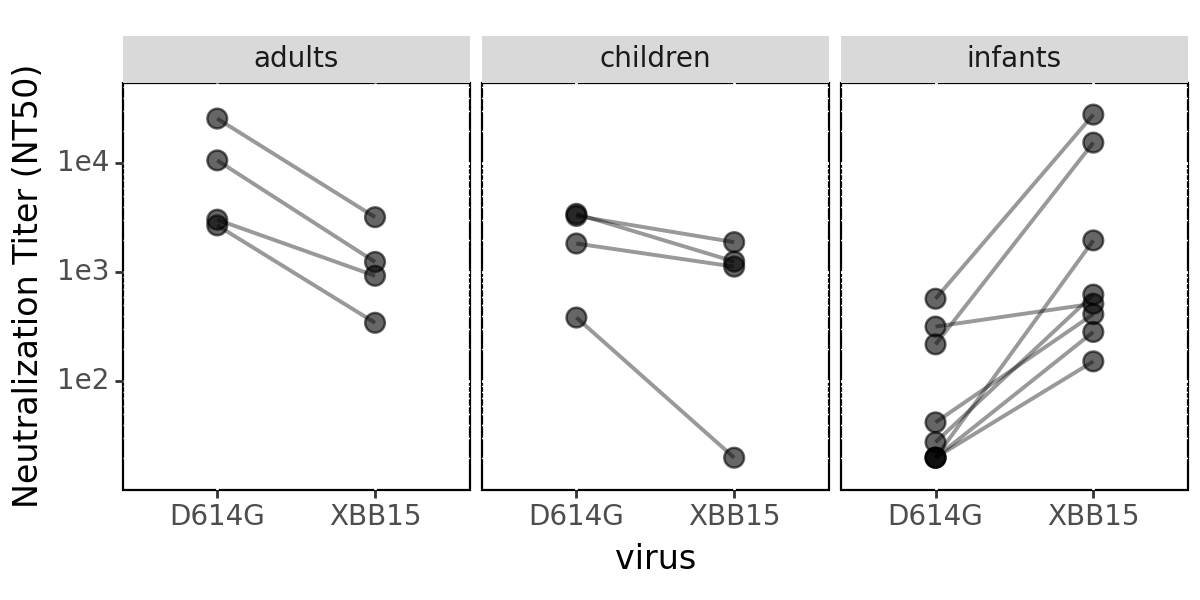

In [15]:

fitparams_WT['group_label'] = fitparams_WT['group'].map({
    'adult': 'adults',    
    'child': 'children',
    'infant': 'infants' 
})

NT50_faceted = (ggplot(fitparams_WT, aes(x='virus', y='NT50', group='serum')) +
              geom_point(size=3.5, alpha = 0.6) +
              geom_line(size=.8, alpha = 0.4) +
              theme(
                   figure_size=(6,3),
                   axis_text=element_text(size=10),
                   axis_text_x=element_text(size=10),
                   legend_text=element_text(size=10),
                   axis_title_x=element_text(size=12),
                   axis_title_y=element_text(size=12),
                   strip_text=element_text(size=10),
                   panel_background=element_rect(fill='white'),
                   plot_background=element_rect(fill='white'),
                  panel_border=element_line(color='black', size=.8)
                  ) +
              scale_y_log10(expand=(0.03, .2)) +
              ylab('Neutralization Titer (NT50)') +
              xlab('virus') +
              scale_color_manual(values=CBPALETTE[1:])+
            facet_wrap('~group_label')
               )


NT50_faceted.save("results/NT50s_faceted.svg", format="svg")
NT50_faceted.save("results/NT50s_faceted.png", format="png", dpi=300)
NT50_faceted.draw()

## Chalculate NT50 change

In [16]:
def calculate_nt50_change(row, df):
    # Get the NT50 value where virus is 'XBB15' for the same serum
    nt50_xbb15 = df[(df['serum'] == row['serum']) & (df['virus'] == 'XBB15')]['NT50'].values
    # Ensure that we have the value to avoid errors
    if len(nt50_xbb15) == 0 or row['NT50'] == 0:
        return None
    else:
        return nt50_xbb15[0] / row['NT50']

# Apply the calculation to the entire DataFrame
fitparams['NT50_change'] = fitparams.apply(lambda row: calculate_nt50_change(row, fitparams), axis=1)

# Display the resulting DataFrame
fitparams.head()

,serum,virus,replicate,nreplicates,ic50,ic50_bound,ic50_str,ic90,ic90_bound,ic90_str,...,ic99_bound,ic99_str,midpoint,slope,top,bottom,NT50,ic50_is_bound,group,NT50_change
0,infant-2-born2022_exposure1,S31-,average,2,0.001754,interpolated,0.00175,0.007984,interpolated,0.00798,...,interpolated,0.0417,0.001754,1.450055,True,0,569.991276,False,infant,3.450371
1,infant-2-born2022_exposure1,K147N,average,2,0.000817,interpolated,0.000817,0.003836,interpolated,0.00384,...,interpolated,0.0207,0.000817,1.420438,True,0,1224.415515,False,infant,1.606220
2,infant-2-born2022_exposure1,S256E,average,2,0.000809,interpolated,0.000809,0.004547,interpolated,0.00455,...,interpolated,0.0299,0.000809,1.272902,True,0,1235.677911,False,infant,1.591581
3,infant-2-born2022_exposure1,F456L,average,2,0.000475,interpolated,0.000475,0.002937,interpolated,0.00294,...,interpolated,0.0215,0.000475,1.205586,True,0,2106.786451,False,infant,0.933498
4,infant-2-born2022_exposure1,Y473N,average,2,0.000237,interpolated,0.000237,0.001205,interpolated,0.00121,...,interpolated,0.0071,0.000237,1.352545,True,0,4211.940994,False,infant,0.466930


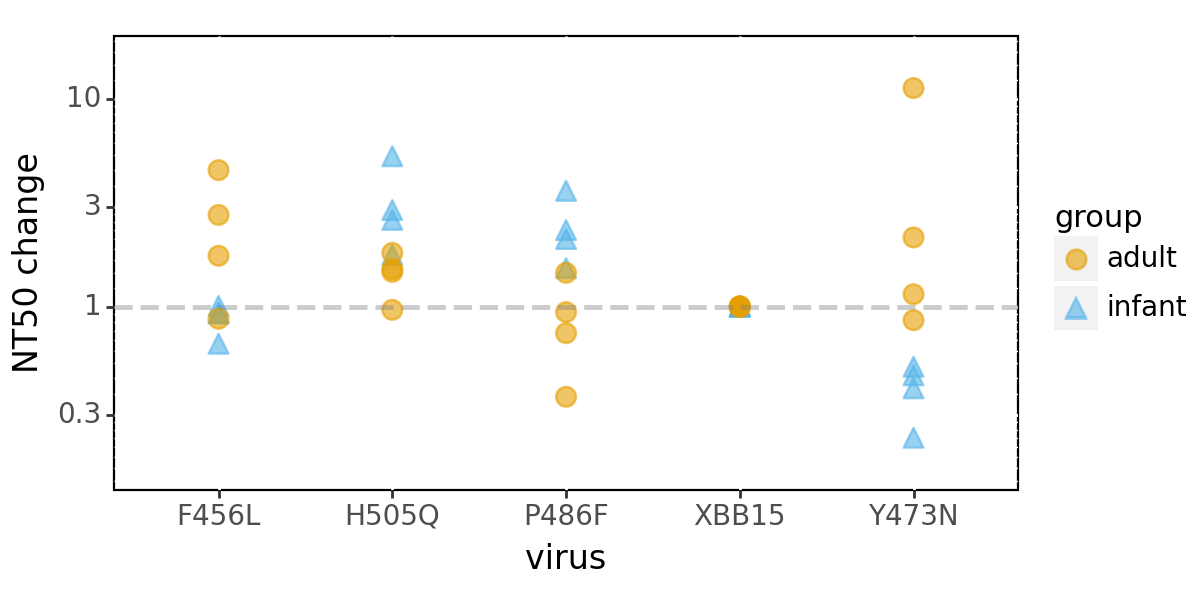

In [17]:
fitparams_compare = fitparams[fitparams['serum'].isin(["infant-2-born2022_exposure1","infant-4-born2022_exposure1",
                                  "infant-5-born2022_exposure1","infant-5-born2022_exposure2",
                                 "adult-1","adult-2", "adult-3", "adult-4"])]
fitparams_RBD = fitparams_compare[fitparams_compare['virus'].isin(['F456L', 'Y473N', 'P486F','H505Q','XBB15'])]

NT50_change_RBD = (ggplot(fitparams_RBD, aes(x='virus', y='NT50_change', group='serum', color='group', shape = 'group')) +
              geom_point(size=3.5, alpha = 0.6) +
              # geom_line(size=.8, alpha = 0.4) +
              theme(
                   figure_size=(6,3),
                   axis_text=element_text(size=10),
                   axis_text_x=element_text(size=10),
                   legend_text=element_text(size=10),
                   axis_title_x=element_text(size=12),
                   axis_title_y=element_text(size=12),
                   strip_text=element_text(size=10),
                   panel_background=element_rect(fill='white'),
                   plot_background=element_rect(fill='white'),
                  panel_border=element_line(color='black', size=.8)
                  ) +
    geom_hline(yintercept=1, color='grey', linetype='dashed', size=1, alpha=0.4) +  # Add dashed grey line at y = 1
    scale_y_log10(expand=(0.03, .2)) +
              scale_y_log10(expand=(0.03, .2)) +
              ylab('NT50 change') +
              xlab('virus') +
              scale_color_manual(values=CBPALETTE[1:])
          )


NT50_change_RBD.save("results/NT50_change_RBD.svg", format="svg")
NT50_change_RBD.save("results/NT50_change_RBD.png", format="png", dpi=300)
NT50_change_RBD.draw()

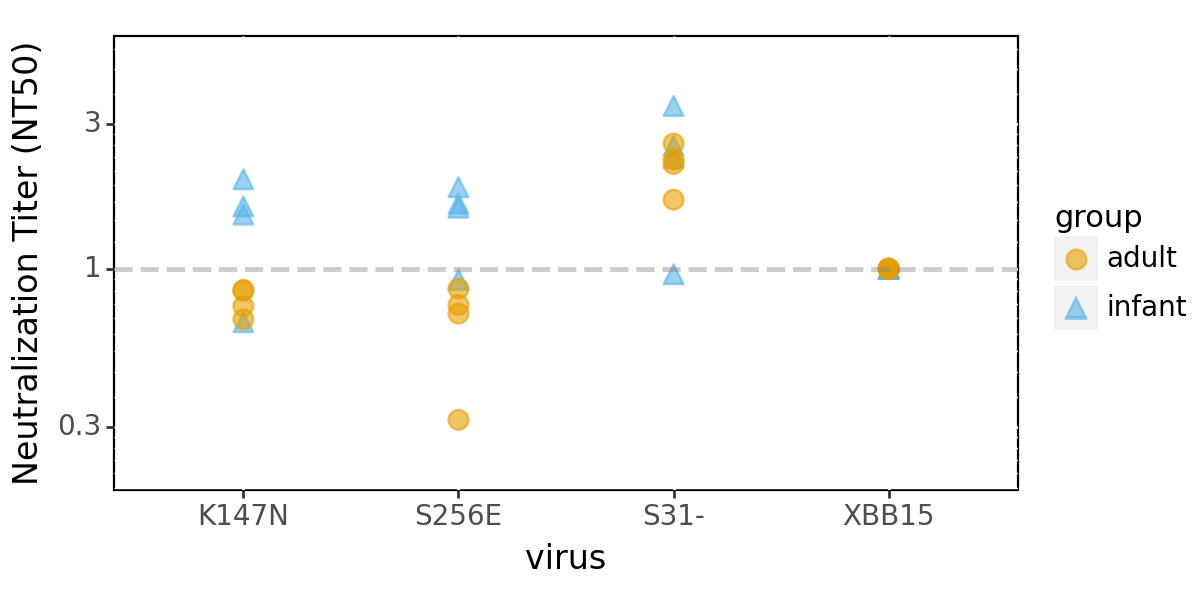

In [18]:
fitparams_compare = fitparams[fitparams['serum'].isin(["infant-2-born2022_exposure1","infant-4-born2022_exposure1",
                                  "infant-5-born2022_exposure1","infant-5-born2022_exposure2",
                                 "adult-1","adult-2", "adult-3", "adult-4"])]
fitparams_NTD = fitparams_compare[fitparams_compare['virus'].isin(['S31-', 'K147N', 'S256E', 'XBB15'])]

NT50_NTD_change = (ggplot(fitparams_NTD, aes(x='virus', y='NT50_change', group='serum', color='group', shape = 'group')) +
              geom_point(size=3.5, alpha = 0.6) +
              # geom_line(size=.8, alpha = 0.4) +
              theme(
                   figure_size=(6,3),
                   axis_text=element_text(size=10),
                   axis_text_x=element_text(size=10),
                   legend_text=element_text(size=10),
                   axis_title_x=element_text(size=12),
                   axis_title_y=element_text(size=12),
                   strip_text=element_text(size=10),
                   panel_background=element_rect(fill='white'),
                   plot_background=element_rect(fill='white'),
                  panel_border=element_line(color='black', size=.8)
                  ) +
                geom_hline(yintercept=1, color='grey', linetype='dashed', size=1, alpha=0.4) +  # Add dashed grey line at y = 1
              scale_y_log10(expand=(0.03, .2)) +
              ylab('Neutralization Titer (NT50)') +
              xlab('virus') +
              scale_color_manual(values=CBPALETTE[1:])
          )


NT50_NTD_change.save("results/NT50_change_NTD.svg", format="svg")
NT50_NTD_change.save("results/NT50_change_NTD.png", format="png", dpi=300)
NT50_NTD_change.draw()